##**Project Title: Data Analysis and Visualization of House Prices**

**Objective:**
The objective of this project is to analyze a housing dataset, identify patterns using visualizations, and build a basic prediction model to estimate house prices.

In [68]:
from google.colab import files

uploaded = files.upload()

Saving House Price India.csv to House Price India (2).csv


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline


In [70]:
df = pd.read_csv("House Price India.csv")
df.head()  # Show first 5 rows


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [71]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.head()

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


## **1. Data Cleaning and Preparation**


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   date                                   14619 non-null  int64  
 2   number_of_bedrooms                     14619 non-null  int64  
 3   number_of_bathrooms                    14619 non-null  float64
 4   living_area                            14619 non-null  int64  
 5   lot_area                               14619 non-null  int64  
 6   number_of_floors                       14619 non-null  float64
 7   waterfront_present                     14619 non-null  int64  
 8   number_of_views                        14619 non-null  int64  
 9   condition_of_the_house                 14619 non-null  int64  
 10  grade_of_the_house                     14619 non-null  int64  
 11  ar

In [73]:
df.isnull().sum()

,0
id,0
date,0
number_of_bedrooms,0
number_of_bathrooms,0
living_area,0
lot_area,0
number_of_floors,0
waterfront_present,0
number_of_views,0
condition_of_the_house,0


In [74]:
df['date'] = pd.to_datetime(df['date'], unit='D', origin='1899-12-30')
df.head()

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
0,6762810635,2016-05-01,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,2016-05-01,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,2016-05-01,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,2016-05-01,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,2016-05-01,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [75]:
print(df.columns)

Index(['id', 'date', 'number_of_bedrooms', 'number_of_bathrooms',
       'living_area', 'lot_area', 'number_of_floors', 'waterfront_present',
       'number_of_views', 'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')


In [76]:
df.rename(columns={
    'number of bedrooms': 'num_bedrooms',
    'number of bathrooms': 'num_bathrooms',
    'living area': 'living_area',
    'lot area': 'lot_area',
    'number of floors': 'num_floors',
    'waterfront present': 'waterfront_present',
    'number of views': 'num_views',
    'condition of the house': 'condition_grade',
    'grade of the house': 'house_grade',
    'Area of the house(excluding basement)': 'area_house_no_basement',
    'Area of the basement': 'area_basement',
    'Built Year': 'built_year',
    'Renovation Year': 'renovation_year',
    'Postal Code': 'postal_code',
    'Lattitude': 'latitude',
    'Longitude': 'longitude',
    'Number of schools nearby': 'num_schools_nearby',
    'Distance from the airport': 'distance_from_airport'
}, inplace=True)
df.columns

Index(['id', 'date', 'number_of_bedrooms', 'number_of_bathrooms',
       'living_area', 'lot_area', 'number_of_floors', 'waterfront_present',
       'number_of_views', 'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

In [77]:
df.describe()

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
count,1.461900e+04,14619,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,2016-08-22 13:06:50.014364928,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
min,6.762810e+09,2016-05-01 00:00:00,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,2016-06-25 00:00:00,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,2016-08-18 00:00:00,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,2016-10-19 00:00:00,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,2016-12-30 00:00:00,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06
std,6.237162e+03,NaN,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05


In [78]:
df = df[df['number_of_bedrooms'] < 30] # Removing the outlier with 33 bedrooms
df.describe()

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
count,1.461800e+04,14618,14618.000000,14618.000000,14618.000000,1.461800e+04,14618.000000,14618.000000,14618.000000,14618.000000,...,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,1.461800e+04
mean,6.762821e+09,2016-08-22 13:12:41.964700928,3.377206,2.129583,2098.189561,1.509432e+04,1.502360,0.007662,0.232864,3.430291,...,1970.931454,90.936448,122033.064646,52.792834,-114.403988,1996.687440,12754.554043,2.012245,64.952456,5.387994e+05
min,6.762810e+09,2016-05-01 00:00:00,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,2016-06-25 00:00:00,3.000000,1.750000,1440.000000,5.010250e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.518750,1490.000000,5098.250000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,2016-08-18 00:00:00,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,2016-10-19 00:00:00,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,2016-12-30 00:00:00,11.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06
std,6.237218e+03,NaN,0.906148,0.769975,928.242065,3.792211e+04,0.540244,0.087199,0.765675,0.663943,...,29.492087,416.243776,19.082057,0.137526,0.141327,691.080027,26060.041020,0.817340,8.935578,3.672410e+05


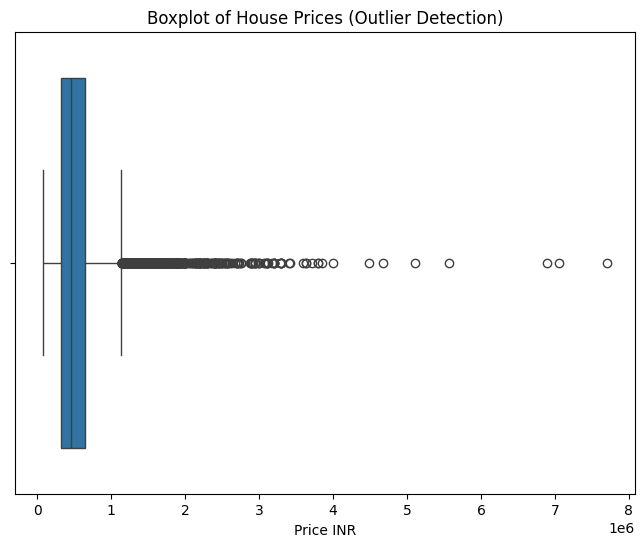

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices (Outlier Detection)")
plt.xlabel("Price INR")
plt.show()

### Observations Outlier Detection

**Boxplot of House Prices**: The boxplot reveals a highly right-skewed distribution for house prices, with numerous outliers indicating a significant number of very expensive properties.

## **2. Distribution Analysis**
**Histogram Chart:**


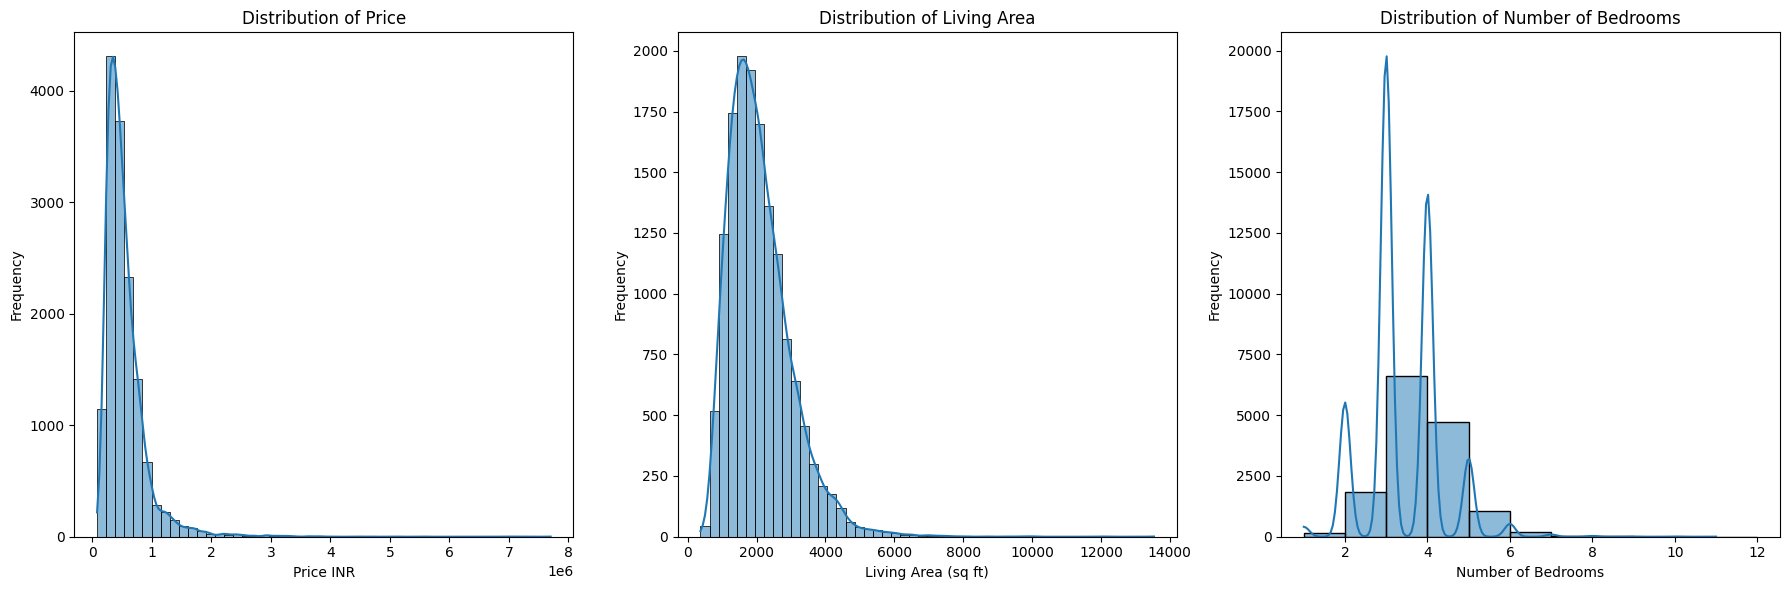

In [80]:
plt.figure(figsize=(18, 6))

# Histogram for Price
plt.subplot(1, 3, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price INR')
plt.ylabel('Frequency')

# Histogram for Living Area
plt.subplot(1, 3, 2)
sns.histplot(df['living_area'], bins=50, kde=True)
plt.title('Distribution of Living Area')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Frequency')

# Histogram for Number of Bedrooms
plt.subplot(1, 3, 3)
sns.histplot(df['number_of_bedrooms'], bins=range(int(df['number_of_bedrooms'].min()), int(df['number_of_bedrooms'].max()) + 2), kde=True)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observations

**Price Distribution**: The distribution of 'Price' is highly right-skewed, with the majority of house prices concentrated at the lower end and a long tail extending towards higher values. The prices range significantly, from around $78,000 to $7.7 million, with numerous outliers indicating very expensive properties.

**Living Area Distribution**: The 'living_area' distribution is also right-skewed, with most houses having smaller living areas and fewer houses with very large living spaces. There are some outliers indicating exceptionally large living areas, contributing to the spread of the data.

**Number of Bedrooms Distribution**: The 'num_bedrooms' distribution shows a clear central tendency around 3 to 4 bedrooms, which is typical for most houses. While the majority falls within this range, there is a spread from 1 to 11 bedrooms, indicating a variety of house sizes.

## **3. Comparison Analysis**
**Bar Charts:**


In [83]:
avg_price_by_bedrooms = df.groupby('number_of_bedrooms')['price'].mean().reset_index()
print(avg_price_by_bedrooms.head())

   number_of_bedrooms          price
0                   1  308963.750000
1                   2  398547.572126
2                   3  463277.559286
3                   4  636198.810965
4                   5  773766.398887


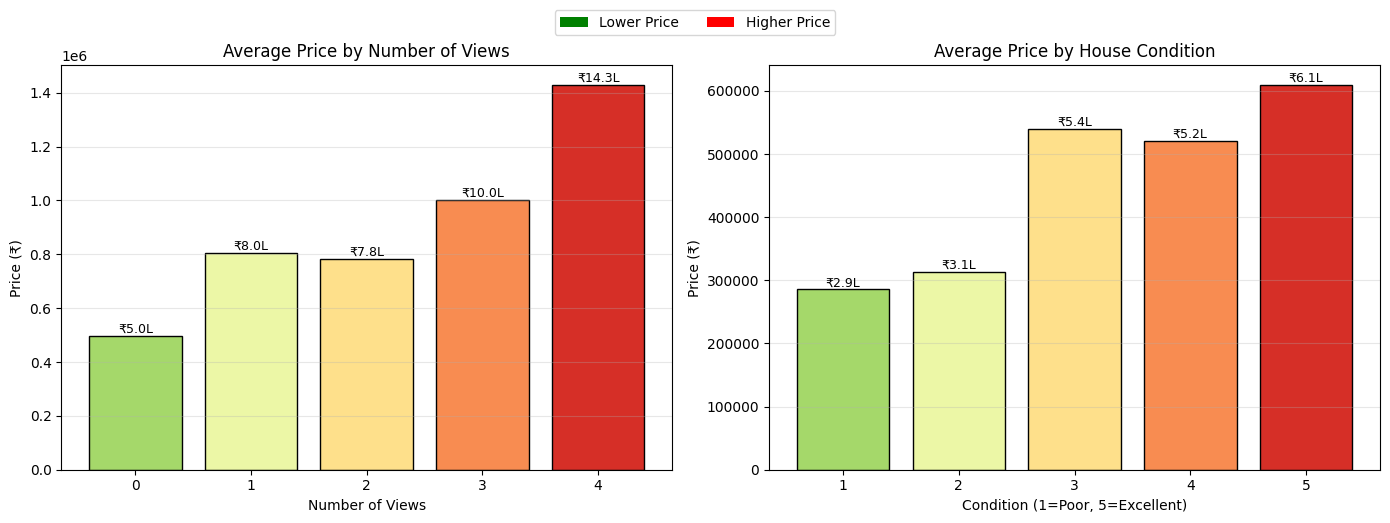


KEY INSIGHTS:
• More views = Higher price (5.0L → 14.3L)
• Better condition = Higher price (2.9L → 6.1L)


In [109]:
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

price_by_views = df.groupby('number_of_views')['price'].mean()
# Light green to dark red gradient
colors_views = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(price_by_views)))

bars1 = axes[0].bar(price_by_views.index, price_by_views.values,
                    color=colors_views, edgecolor='black')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'₹{height/100000:.1f}L', ha='center', va='bottom', fontsize=9)

axes[0].set_title('Average Price by Number of Views')
axes[0].set_xlabel('Number of Views')
axes[0].set_ylabel('Price (₹)')
axes[0].grid(axis='y', alpha=0.3)

price_by_condition = df.groupby('condition_of_the_house')['price'].mean()
# Light green to dark red gradient
colors_cond = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(price_by_condition)))

bars2 = axes[1].bar(price_by_condition.index, price_by_condition.values,
                    color=colors_cond, edgecolor='black')

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'₹{height/100000:.1f}L', ha='center', va='bottom', fontsize=9)

axes[1].set_title('Average Price by House Condition')
axes[1].set_xlabel('Condition (1=Poor, 5=Excellent)')
axes[1].set_ylabel('Price (₹)')
axes[1].grid(axis='y', alpha=0.3)


from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', label='Lower Price'),
                   Patch(facecolor='red', label='Higher Price')]
fig.legend(handles=legend_elements, loc='upper center',
           bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

print("\nKEY INSIGHTS:")
print(f"• More views = Higher price ({price_by_views[0]/100000:.1f}L → {price_by_views[4]/100000:.1f}L)")
print(f"• Better condition = Higher price ({price_by_condition[1]/100000:.1f}L → {price_by_condition[5]/100000:.1f}L)")

### Observations

Both comparisons reveal positive trends: increased views and better condition lead to higher prices. The color progression from green (low) to red (high) visually confirms these relationships across all categories

## **4. Relationship Mapping**
**Scatter Plot:**


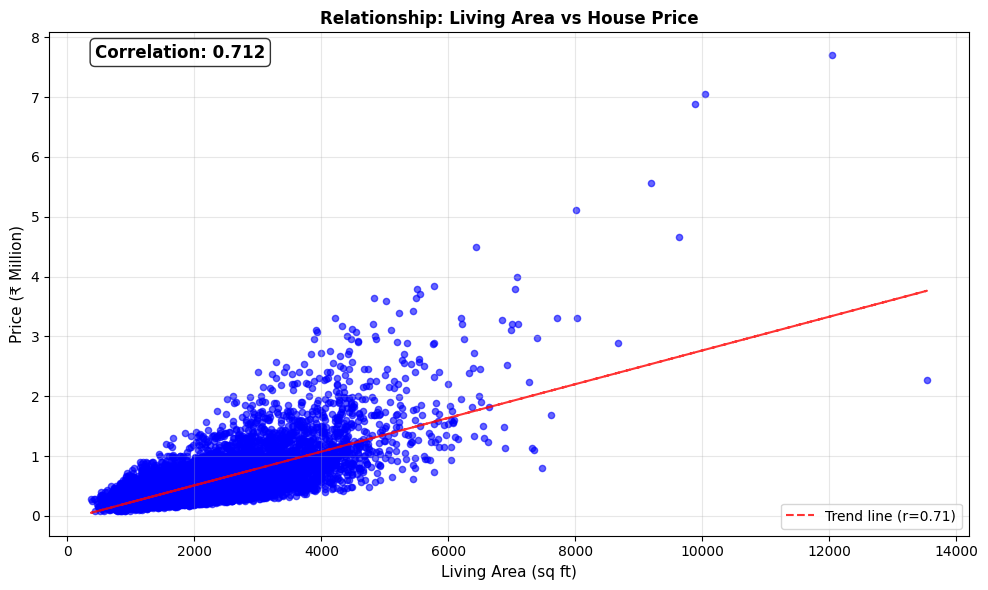


OBSERVATION:
• The scatter plot shows a positive linear relationship between
• living area and house price. As living area increases, prices
tend to increase with a correlation of 0.712.


In [115]:
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(df['living_area'], df['price']/1000000,  # Convert to millions
            alpha=0.6, s=20, color='blue')

# Calculate and display correlation
correlation = df['living_area'].corr(df['price'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
         transform=plt.gca().transAxes,
         fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add trend line
z = np.polyfit(df['living_area'], df['price']/1000000, 1)
p = np.poly1d(z)
plt.plot(df['living_area'], p(df['living_area']), "r--", alpha=0.8,
         label=f'Trend line (r={correlation:.2f})')

plt.title('Relationship: Living Area vs House Price', fontsize=12, fontweight='bold')
plt.xlabel('Living Area (sq ft)', fontsize=11)
plt.ylabel('Price (₹ Million)', fontsize=11)
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nOBSERVATION:")
print("• The scatter plot shows a positive linear relationship between")
print("• living area and house price. As living area increases, prices")
print(f"tend to increase with a correlation of {correlation:.3f}.")


## **5. Correlation Heatmap**


In [87]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix.head())

                           id  number_of_bedrooms  number_of_bathrooms  \
id                   1.000000           -0.338796            -0.516955   
number_of_bedrooms  -0.338796            1.000000             0.529196   
number_of_bathrooms -0.516955            0.529196             1.000000   
living_area         -0.648111            0.592083             0.753536   
lot_area            -0.100315            0.036211             0.080805   

                     living_area  lot_area  number_of_floors  \
id                     -0.648111 -0.100315         -0.312309   
number_of_bedrooms      0.592083  0.036211          0.185656   
number_of_bathrooms     0.753536  0.080805          0.502900   
living_area             1.000000  0.174449          0.354663   
lot_area                0.174449  1.000000         -0.004143   

                     waterfront_present  number_of_views  \
id                            -0.112967        -0.292725   
number_of_bedrooms            -0.006275         0.

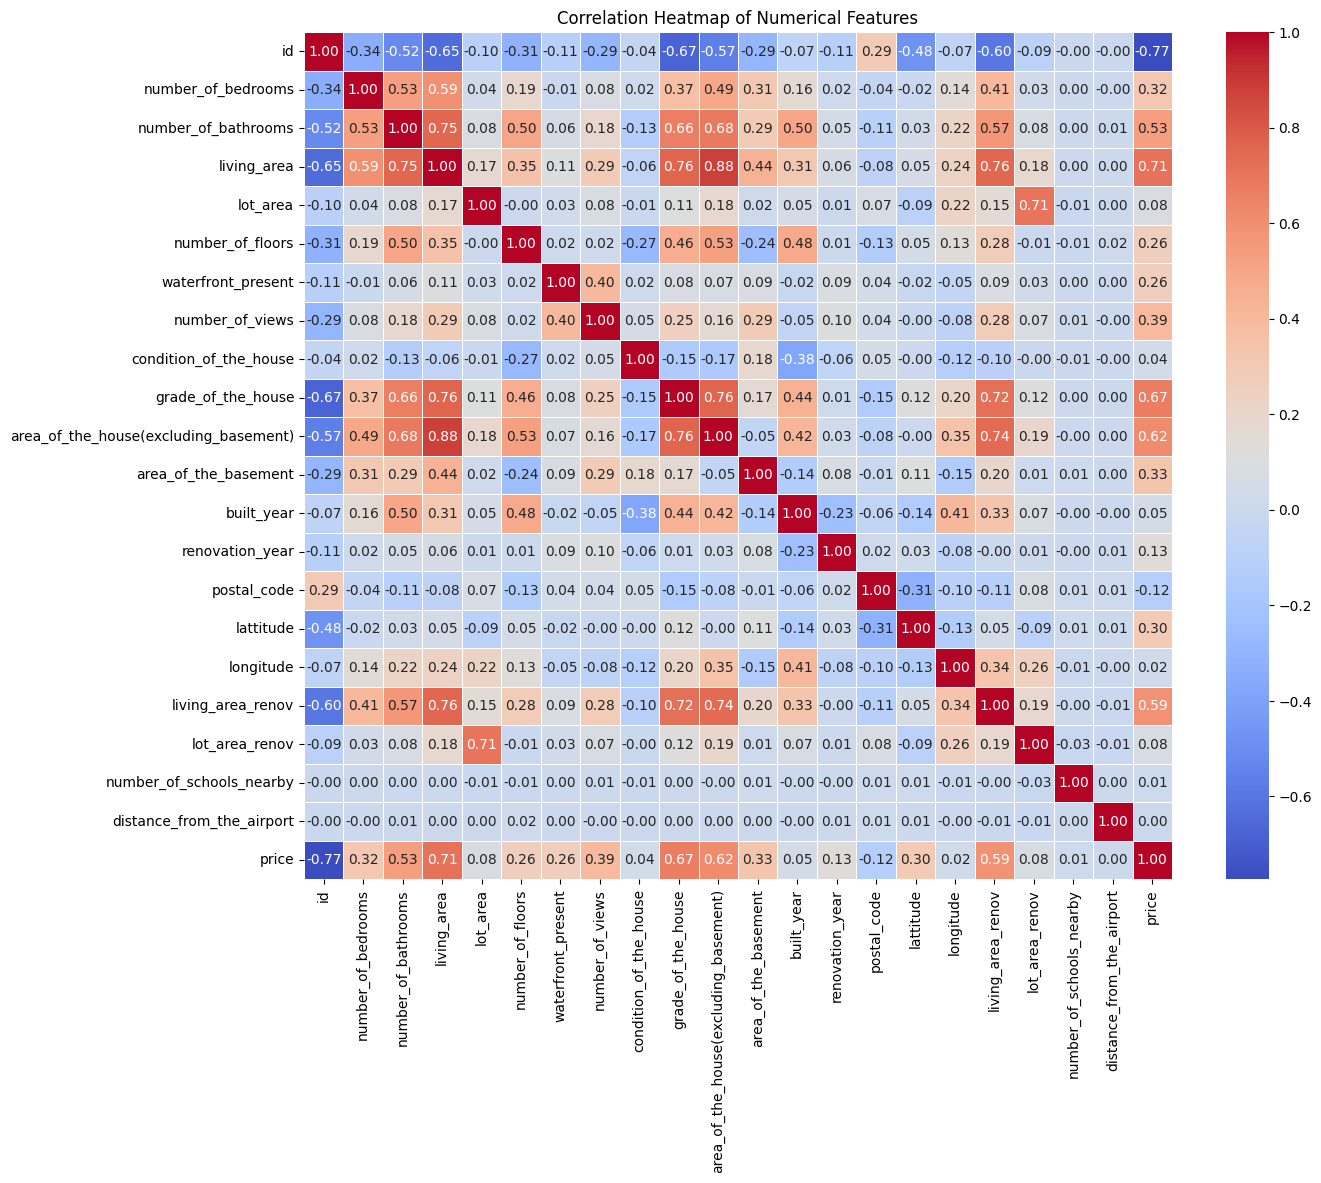


HEATMAP OBSERVATION:
----------------------------------------
• The heatmap shows strong positive correlations between living area,
house grade, and price (red cells). Variables with weaker relationships
appear in lighter colors or blue for negative correlations.


In [116]:
plt.figure(figsize=(14, 11)) # Set an appropriate figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

print("\nHEATMAP OBSERVATION:")
print("-"*40)
print("• The heatmap shows strong positive correlations between living area,")
print("house grade, and price (red cells). Variables with weaker relationships")
print("appear in lighter colors or blue for negative correlations.")

## **6. Prepare Data for Modeling**

In [89]:
y = df['price']
X = df.drop(columns=['id', 'date', 'price', 'living_area_renov', 'lot_area_renov']) # Drop 'id', 'Date', 'Price', and renovated area to avoid multicollinearity
print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   number_of_bedrooms  number_of_bathrooms  living_area  lot_area  \
0                   4                 2.50         2920      4000   
1                   5                 2.75         2910      9480   
2                   4                 2.50         3310     42998   
3                   3                 2.00         2710      4500   
4                   3                 2.50         2600      4750   

   number_of_floors  waterfront_present  number_of_views  \
0               1.5                   0                0   
1               1.5                   0                0   
2               2.0                   0                0   
3               1.5                   0                0   
4               1.0                   0                0   

   condition_of_the_house  grade_of_the_house  \
0                       5                   8   
1                       3                   8   
2                       3                   9   
3        

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11694, 18)
X_test shape: (2924, 18)
y_train shape: (11694,)
y_test shape: (2924,)


In [91]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [92]:
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


## **7. Model Evaluation**


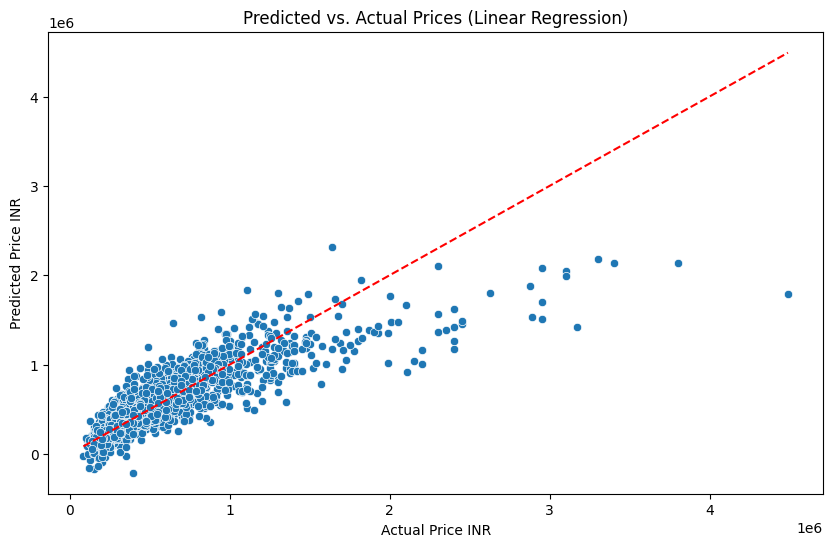

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs. Actual Prices (Linear Regression)')
plt.xlabel('Actual Price INR')
plt.ylabel('Predicted Price INR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Add a diagonal line for perfect prediction
plt.show()

### Observations

**Predicted vs. Actual Prices**: The plot shows a positive linear trend, indicating the model generally predicts higher prices for houses that are actually more expensive. However, there's noticeable scatter, especially at higher actual prices where the model tends to underestimate.

In [94]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 38580964391.39
R-squared (R2) Score: 0.71


### Observations
**Model Performance Metrics**: The Linear Regression model achieved an MSE of ~38.6 billion and an R² of 0.71, indicating it explains 71% of the variance in house prices. The large MSE reflects the scale of prices, with some variance still unexplained.